In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [94]:
dataset = pd.read_csv('properties_data.csv')
dataset.head()

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,...,False,True,True,True,True,False,False,True,True,False


In [95]:
dataset2 = dataset.drop(['neighborhood', 'longitude', 'latitude','price_per_sqft','id','quality'], axis=1)
dataset2.head()

,price,size_in_sqft,no_of_bedrooms,no_of_bathrooms,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,central_ac,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,2700000,1079,1,2,False,False,True,True,False,True,...,False,False,True,False,False,False,False,False,True,False
1,2850000,1582,2,2,False,False,True,False,True,True,...,False,False,True,True,False,False,False,False,True,False
2,1150000,1951,3,5,True,True,True,False,True,False,...,False,True,True,True,False,False,False,True,True,True
3,2850000,2020,2,3,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1729200,507,0,1,False,False,False,False,True,True,...,False,True,True,True,True,False,False,True,True,False


In [96]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
dataset_encoded = dataset2.iloc[:,4:33]

for i in dataset_encoded:
    dataset2[i] = le.fit_transform(dataset_encoded[i])

dataset2.head()

,price,size_in_sqft,no_of_bedrooms,no_of_bathrooms,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,central_ac,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,2700000,1079,1,2,0,0,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0
1,2850000,1582,2,2,0,0,1,0,1,1,...,0,0,1,1,0,0,0,0,1,0
2,1150000,1951,3,5,1,1,1,0,1,0,...,0,1,1,1,0,0,0,1,1,1
3,2850000,2020,2,3,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1729200,507,0,1,0,0,0,0,1,1,...,0,1,1,1,1,0,0,1,1,0


In [99]:
columns = [ 'size_in_sqft', 'no_of_bedrooms', 'no_of_bathrooms' ,'maid_room' ,'unfurnished' ,            
               'balcony' , 'barbecue_area' , 'built_in_wardrobes', 'central_ac' ,'childrens_play_area' ,'childrens_pool' ,         
                'concierge' , 'covered_parking','kitchen_appliances' ,'lobby_in_building','maid_service' ,'networked',
                'pets_allowed' ,'private_garden' ,'private_gym' ,'private_jacuzzi' ,'private_pool' ,'security' ,'shared_gym' ,  
                'shared_pool' ,'shared_spa' ,'study' ,'vastu_compliant' ,'view_of_landmark' ,'view_of_water' ,'walk_in_closet' ,
                'price'] 
dataset2 = dataset2[columns]

In [100]:
dataset2.head()

,size_in_sqft,no_of_bedrooms,no_of_bathrooms,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,central_ac,childrens_play_area,...,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet,price
0,1079,1,2,0,0,1,1,0,1,1,...,0,1,0,0,0,0,0,1,0,2700000
1,1582,2,2,0,0,1,0,1,1,1,...,0,1,1,0,0,0,0,1,0,2850000
2,1951,3,5,1,1,1,0,1,0,0,...,1,1,1,0,0,0,1,1,1,1150000
3,2020,2,3,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2850000
4,507,0,1,0,0,0,0,1,1,0,...,1,1,1,1,0,0,1,1,0,1729200


In [101]:
X = dataset2.iloc[:,0:31].values
Y = dataset2.iloc[:,-1].values

In [102]:
import pandas as pd

# Create a DataFrame from the X variable
X_df = pd.DataFrame(X)


In [103]:
# Print the DataFrame
X_df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1079,1,2,0,0,1,1,0,1,1,...,0,0,1,0,0,0,0,0,1,0
1,1582,2,2,0,0,1,0,1,1,1,...,0,0,1,1,0,0,0,0,1,0
2,1951,3,5,1,1,1,0,1,0,0,...,0,1,1,1,0,0,0,1,1,1
3,2020,2,3,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,507,0,1,0,0,0,0,1,1,0,...,0,1,1,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,1087,2,2,0,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
1901,760,1,2,0,0,1,0,1,1,1,...,0,0,1,1,0,0,0,0,1,1
1902,1930,3,5,1,1,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
1903,740,1,2,0,1,1,0,1,1,1,...,0,1,1,1,0,0,0,0,1,1


In [104]:
import pandas as pd

# Create a DataFrame from the X variable
Y_df = pd.DataFrame(Y)

In [105]:
Y_df

,0
0,2700000
1,2850000
2,1150000
3,2850000
4,1729200
...,...
1900,1500000
1901,1230000
1902,2900000
1903,675000


In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=100)

# Multiple Linear Regression

In [108]:
from sklearn.linear_model import LinearRegression
lin_regressor = LinearRegression()
lin_regressor.fit(X_train,Y_train)

LinearRegression()

In [87]:
y_pred = lin_regressor.predict(X_test)

In [109]:
print(X_test[0])
print(Y_test[0])

[1186    1    2    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0]
1750000


In [113]:
lin_regressor.predict([[1186,1,2 ,0, 0 ,0  , 0    ,0 ,   0 ,   0  ,  0  ,  0  ,  0 ,   0,0  ,  0  ,  0  ,  0   , 0   , 0   , 0  ,  0  ,  0   , 0  ,  0   ,0   , 0  ,  0,0   , 0   ,0]])

array([1718714.29])

In [27]:
import pickle
pickle.dump(regressor,open('Frontend/Model/mtregmodel.pkl','wb'))

# Decision Tree Regression

In [115]:
from sklearn.tree import DecisionTreeRegressor
tree_regression = DecisionTreeRegressor(max_depth = 5)
tree_regression.fit(X_test, Y_test)

DecisionTreeRegressor(max_depth=5)

In [116]:
y_pred_1 = tree_regression.predict(X_test)

In [117]:
print(X_test[0])
print(Y_test[0])

[1186    1    2    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0]
1750000


In [118]:
tree_regression.predict([[1186,1,2 ,0, 0 ,0  , 0    ,0 ,   0 ,   0  ,  0  ,  0  ,  0 ,   0,0  ,  0  ,  0  ,  0   , 0   , 0   , 0  ,  0  ,  0   , 0  ,  0   ,0   , 0  ,  0,0   , 0   ,0]])

array([1392497.46])

# SV Regression

In [120]:
from sklearn.svm import SVR
regressor_SVR = SVR(kernel = 'rbf')
regressor_SVR.fit(X_test, Y_test)

SVR()

In [121]:
y_pred_2 = regressor_SVR.predict(X_test)

In [122]:
regressor_SVR.predict([[1186,1,2 ,0, 0 ,0  , 0    ,0 ,   0 ,   0  ,  0  ,  0  ,  0 ,   0,0  ,  0  ,  0  ,  0   , 0   , 0   , 0  ,  0  ,  0   , 0  ,  0   ,0   , 0  ,  0,0   , 0   ,0]])

array([1390001.41])

# Random Forest Regressor 

In [124]:
from sklearn.ensemble import RandomForestRegressor
rand_regression = RandomForestRegressor(n_estimators = 10, random_state = 0)
rand_regression.fit(X_test, Y_test)

RandomForestRegressor(n_estimators=10, random_state=0)

In [125]:
y_pred_3 = rand_regression.predict(X_test)

In [126]:
rand_regression.predict([[1186,1,2 ,0, 0 ,0  , 0    ,0 ,   0 ,   0  ,  0  ,  0  ,  0 ,   0,0  ,  0  ,  0  ,  0   , 0   , 0   , 0  ,  0  ,  0   , 0  ,  0   ,0   , 0  ,  0,0   , 0   ,0]])

array([1560499.9])

In [128]:
from sklearn.metrics import r2_score
print("Multiple Linear Regression R2 Score",r2_score(Y_test, y_pred))
print("Decision Tree Regression R2 Score", r2_score(Y_test, y_pred_1))
print("Support Vector Regression R2 Score", r2_score(Y_test, y_pred_2))
print("Random Forest Regression R2 Score", r2_score(Y_test, y_pred_3))

Multiple Linear Regression R2 Score 0.7497157467812359
Decision Tree Regression R2 Score 0.9658626000401075
Support Vector Regression R2 Score -0.04884327763733376
Random Forest Regression R2 Score 0.970507141272015


In [131]:
models = ["Multiple Linear Regression","Decision Tree Regression","Support Vector Regression","Random Forest Regression"]
n = [r2_score(Y_test, y_pred),r2_score(Y_test, y_pred_1),r2_score(Y_test, y_pred_2),r2_score(Y_test, y_pred_3)]
y_pos = np.arange(len(models))
highlights = ['grey'if (x<max(n)) else 'red' for x in n]

<BarContainer object of 4 artists>

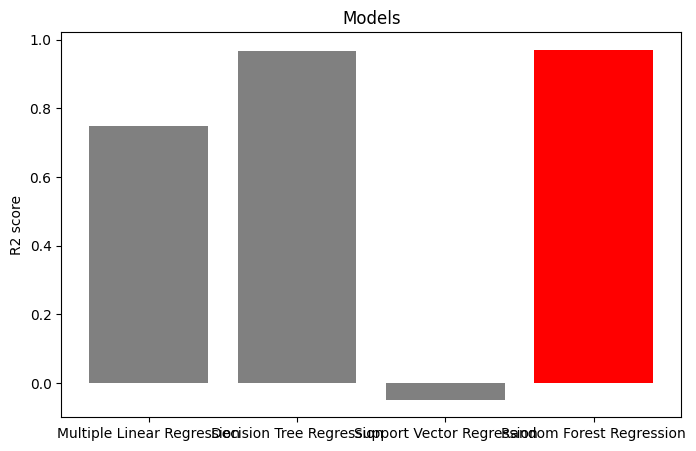

In [132]:
plt.figure(figsize=(8,5))
plt.xticks(y_pos,models)
plt.ylabel('R2 score')
plt.title('Models')
plt.bar(y_pos,n,color=highlights)